In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gc
%matplotlib inline

In [2]:
# import cufflinks as cf
# import chart_studio.plotly as pl
# from plotly.offline import iplot, init_notebook_mode
# init_notebook_mode(connected = True)
# cf.go_offline()

In [3]:
data = pd.read_csv('Chicago_Crimes_2012.csv')

In [64]:
data.head(8)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,WeekDay,hour
0,3,10508693,HZ250496,2016-05-03 23:40:00,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)",5,1,23
1,89,10508695,HZ250409,2016-05-03 21:40:00,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)",5,1,21
2,197,10508697,HZ250503,2016-05-03 23:31:00,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)",5,1,23
3,673,10508698,HZ250424,2016-05-03 22:10:00,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)",5,1,22
4,911,10508699,HZ250455,2016-05-03 22:00:00,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)",5,1,22
5,1108,10508702,HZ250447,2016-05-03 22:35:00,082XX S MARYLAND AVE,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,...,1183336.0,1850642.0,2016,05/10/2016 03:56:50 PM,41.745354,-87.603799,"(41.745354023, -87.603798903)",5,1,22
6,1130,10508703,HZ250489,2016-05-03 22:30:00,027XX S STATE ST,0460,BATTERY,SIMPLE,CHA HALLWAY/STAIRWELL/ELEVATOR,False,...,1176730.0,1886544.0,2016,05/10/2016 03:56:50 PM,41.844024,-87.626923,"(41.844023772, -87.626923253)",5,1,22
7,1801,10508704,HZ250514,2016-05-03 21:30:00,002XX E 46TH ST,0460,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,...,1178514.0,1874573.0,2016,05/10/2016 03:56:50 PM,41.811134,-87.620741,"(41.811133958, -87.62074077)",5,1,21


In [5]:
## Function to reduce the DF size
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose:
        print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [29]:
data['Date'] = pd.to_datetime(data['Date'])

data['Month'] = data['Date'].dt.month
data['WeekDay'] = data['Date'].dt.weekday
data['hour'] = data['Date'].dt.hour

In [80]:
data = reduce_mem_usage(data)

Mem. usage decreased to 73.63 Mb (50.0% reduction)


In [81]:
gc.collect()

106

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1456714 non-null  int64  
 1   ID                    1456714 non-null  int64  
 2   Case Number           1456713 non-null  object 
 3   Date                  1456714 non-null  object 
 4   Block                 1456714 non-null  object 
 5   IUCR                  1456714 non-null  object 
 6   Primary Type          1456714 non-null  object 
 7   Description           1456714 non-null  object 
 8   Location Description  1455056 non-null  object 
 9   Arrest                1456714 non-null  bool   
 10  Domestic              1456714 non-null  bool   
 11  Beat                  1456714 non-null  int64  
 12  District              1456713 non-null  float64
 13  Ward                  1456700 non-null  float64
 14  Community Area        1456674 non-

In [10]:
data.groupby(['FBI Code', 'Primary Type'])['Arrest'].count()

FBI Code  Primary Type                     
01A       HOMICIDE                               2637
01B       HOMICIDE                                 12
02        CRIM SEXUAL ASSAULT                    6823
          OFFENSE INVOLVING CHILDREN              595
03        ROBBERY                               57313
04A       ASSAULT                               23927
04B       BATTERY                               36618
05        BURGLARY                              83397
06        THEFT                                329460
07        MOTOR VEHICLE THEFT                   61138
08A       ASSAULT                               67362
          STALKING                                714
08B       BATTERY                              227082
09        ARSON                                  2200
10        DECEPTIVE PRACTICE                     8267
11        DECEPTIVE PRACTICE                    66547
12        DECEPTIVE PRACTICE                      268
13        DECEPTIVE PRACTICE          

In [27]:
data.groupby(['Primary Type', 'Arrest'])['Arrest'].count()

Primary Type       Arrest
ARSON              False       1999
                   True         218
ASSAULT            False      69941
                   True       21348
BATTERY            False     203199
                              ...  
STALKING           True         142
THEFT              False     292787
                   True       36673
WEAPONS VIOLATION  False       3487
                   True       13746
Name: Arrest, Length: 65, dtype: int64

In [26]:
data['Primary Type'].value_counts()

THEFT                                329460
BATTERY                              263700
CRIMINAL DAMAGE                      155455
NARCOTICS                            135240
ASSAULT                               91289
OTHER OFFENSE                         87874
BURGLARY                              83397
DECEPTIVE PRACTICE                    75495
MOTOR VEHICLE THEFT                   61138
ROBBERY                               57313
CRIMINAL TRESPASS                     36912
WEAPONS VIOLATION                     17233
PUBLIC PEACE VIOLATION                13122
OFFENSE INVOLVING CHILDREN            11398
PROSTITUTION                           7633
CRIM SEXUAL ASSAULT                    6823
INTERFERENCE WITH PUBLIC OFFICER       6195
SEX OFFENSE                            4885
HOMICIDE                               2649
ARSON                                  2217
GAMBLING                               2212
LIQUOR LAW VIOLATION                   1953
KIDNAPPING                      

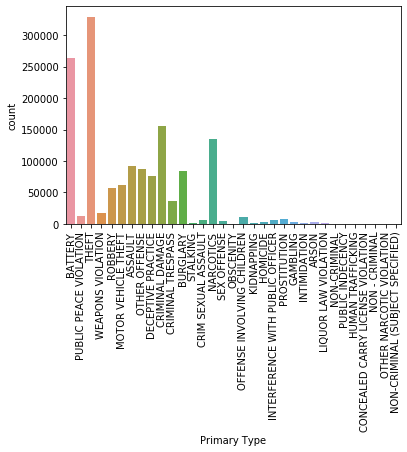

In [20]:
sns.countplot(data['Primary Type'])
plt.xticks(rotation = 90)
plt.show()

The above plot shows that 'Theft' is the crime that is mostly committed, followed by 'Battery' and then 'Criminal Damages'.

In [41]:
# list1 = ['BATTERY', 'CRIMINAL DAMAGE', 'ROBBERY', 'OFFENSE INVOLVING CHILDREN',
#          'HOMICIDE', 'ARSON', 'KIDNAPPING','HUMAN TRAFFICKING']

In [34]:
data.groupby(['Primary Type', 'hour'])['Arrest'].count()

Primary Type       hour
ARSON              0        183
                   1        178
                   2        187
                   3        160
                   4        153
                           ... 
WEAPONS VIOLATION  19      1427
                   20      1343
                   21      1434
                   22      1501
                   23      1240
Name: Arrest, Length: 736, dtype: int64

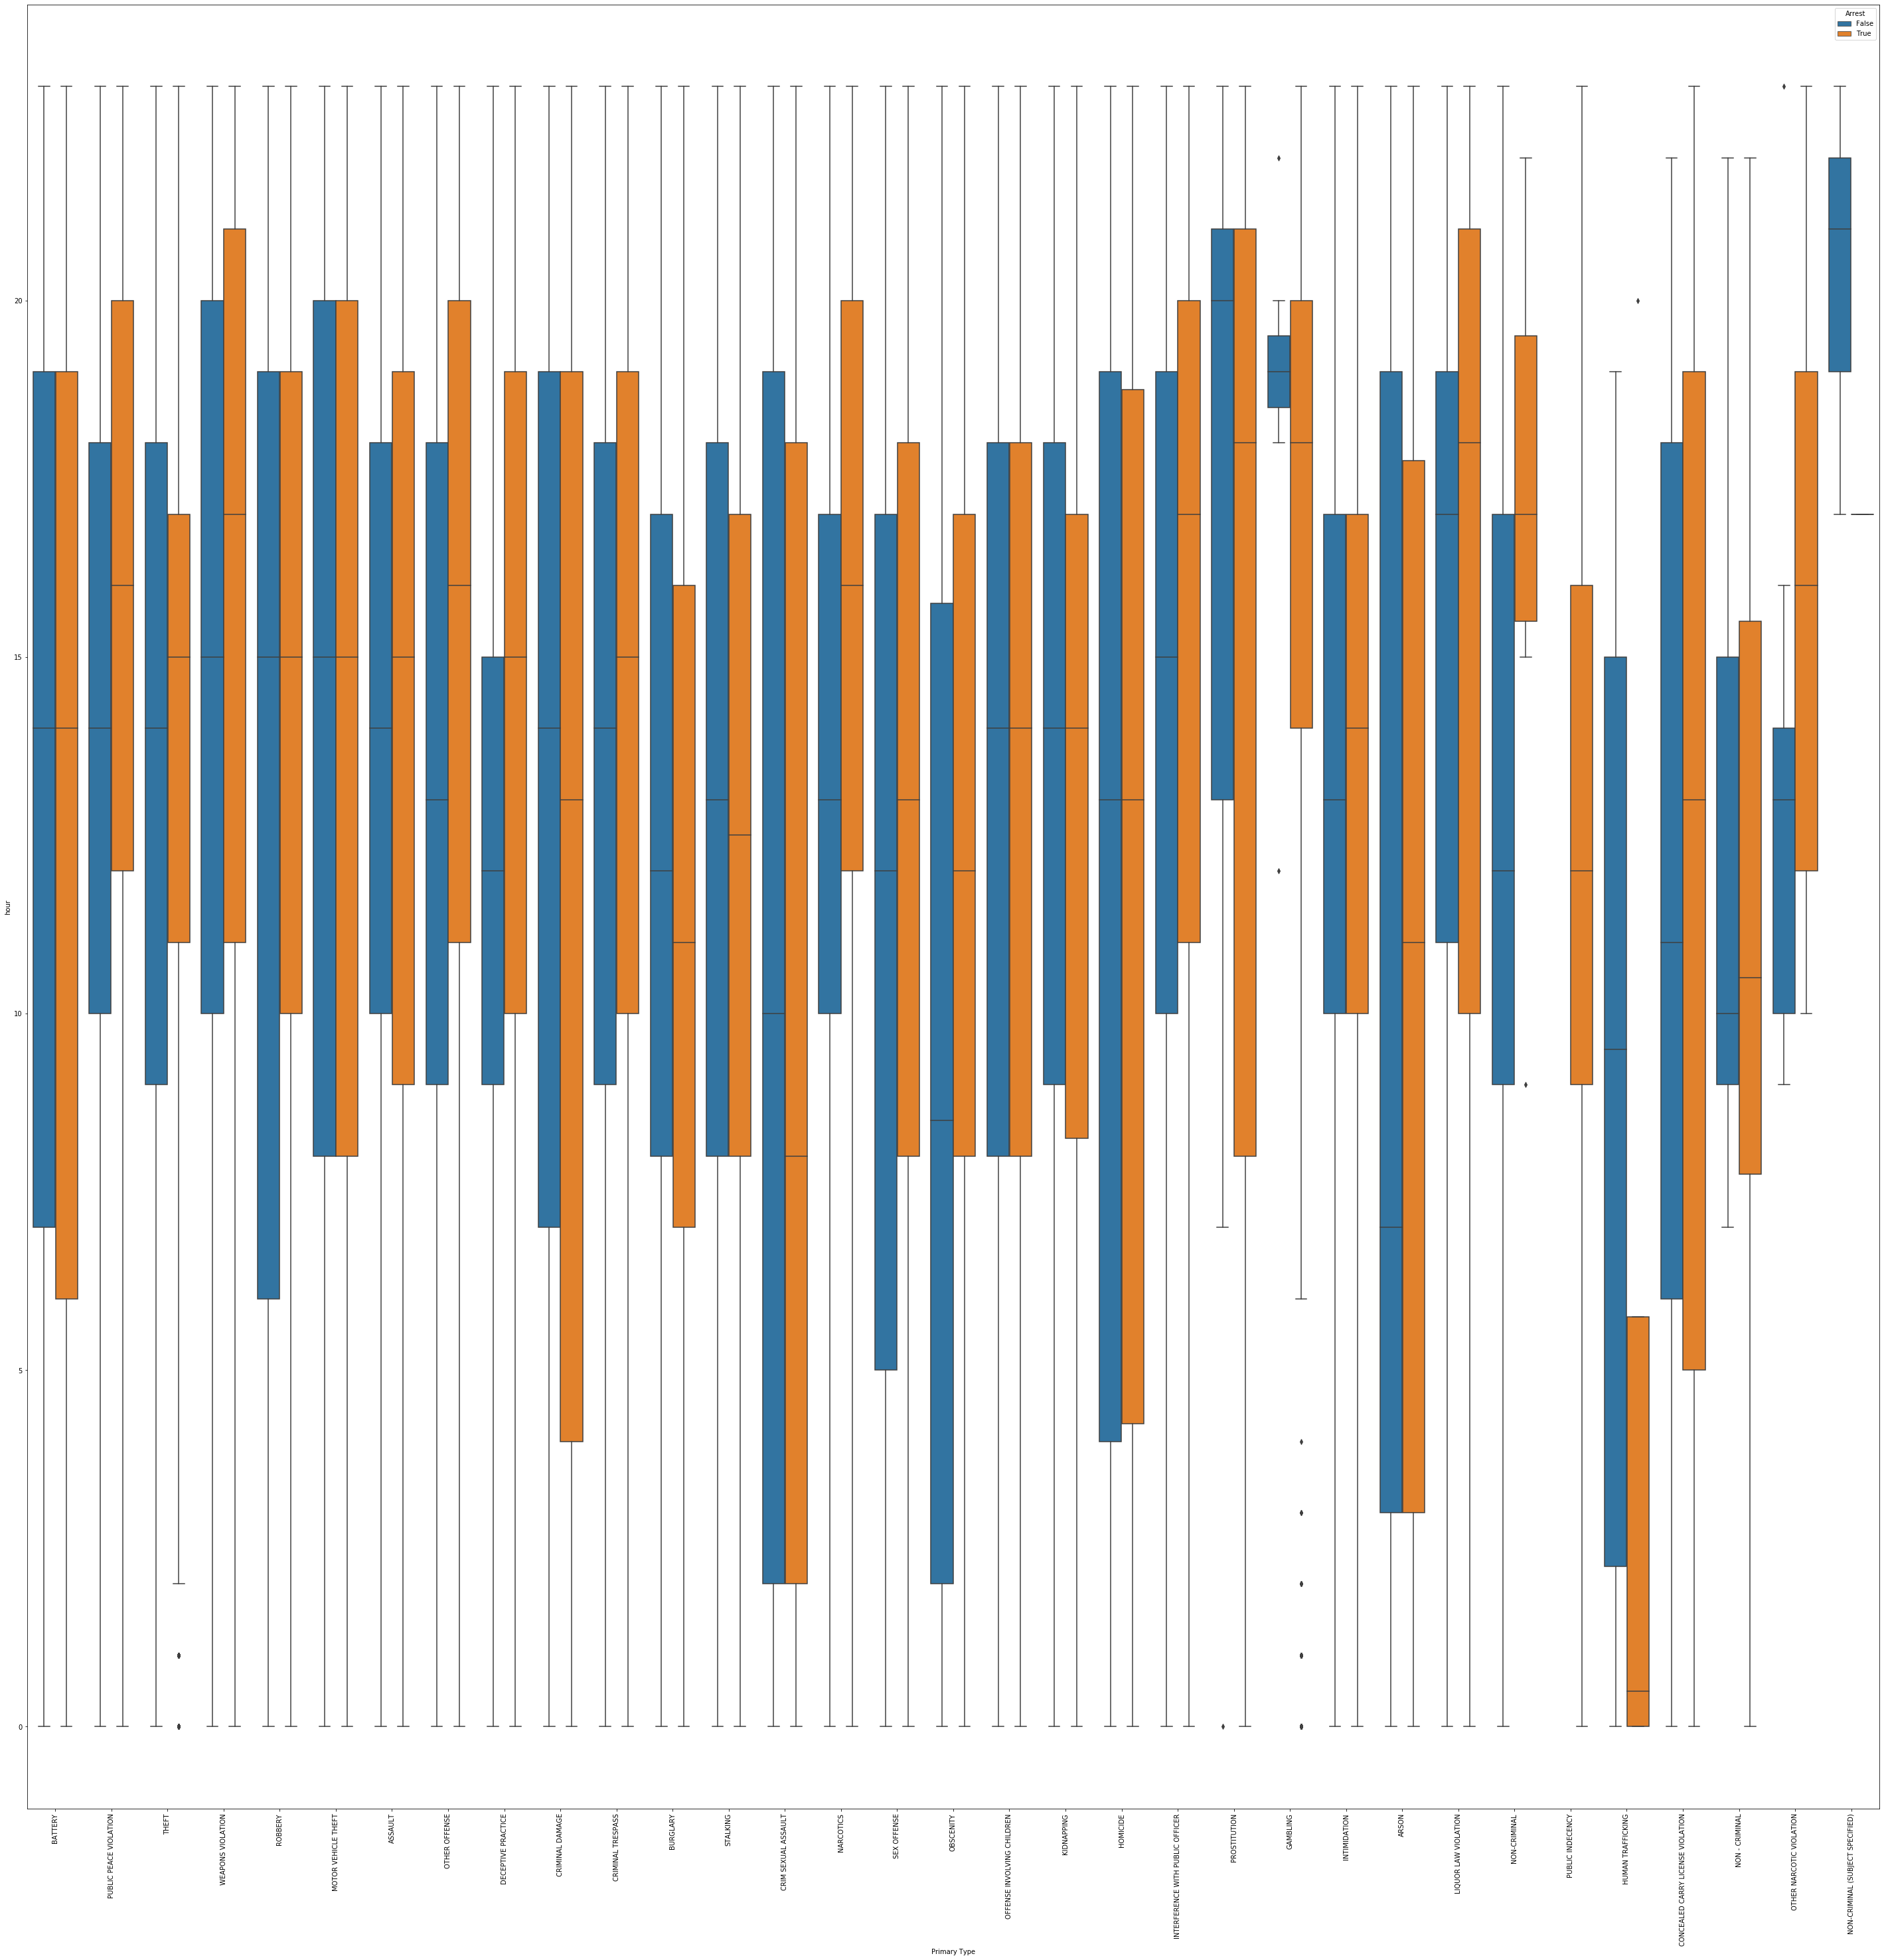

In [31]:
plt.figure(figsize = (50,50))
sns.boxplot(x = 'Primary Type', y = 'hour', data = data, hue = 'Arrest')
plt.xticks(rotation = 90)
plt.show()

In [36]:
data.groupby(['Primary Type', 'Month'])['Arrest'].count()

Primary Type       Month
ARSON              1         163
                   2         121
                   3         181
                   4         199
                   5         227
                            ... 
WEAPONS VIOLATION  8        1619
                   9        1584
                   10       1377
                   11       1244
                   12       1130
Name: Arrest, Length: 386, dtype: int64

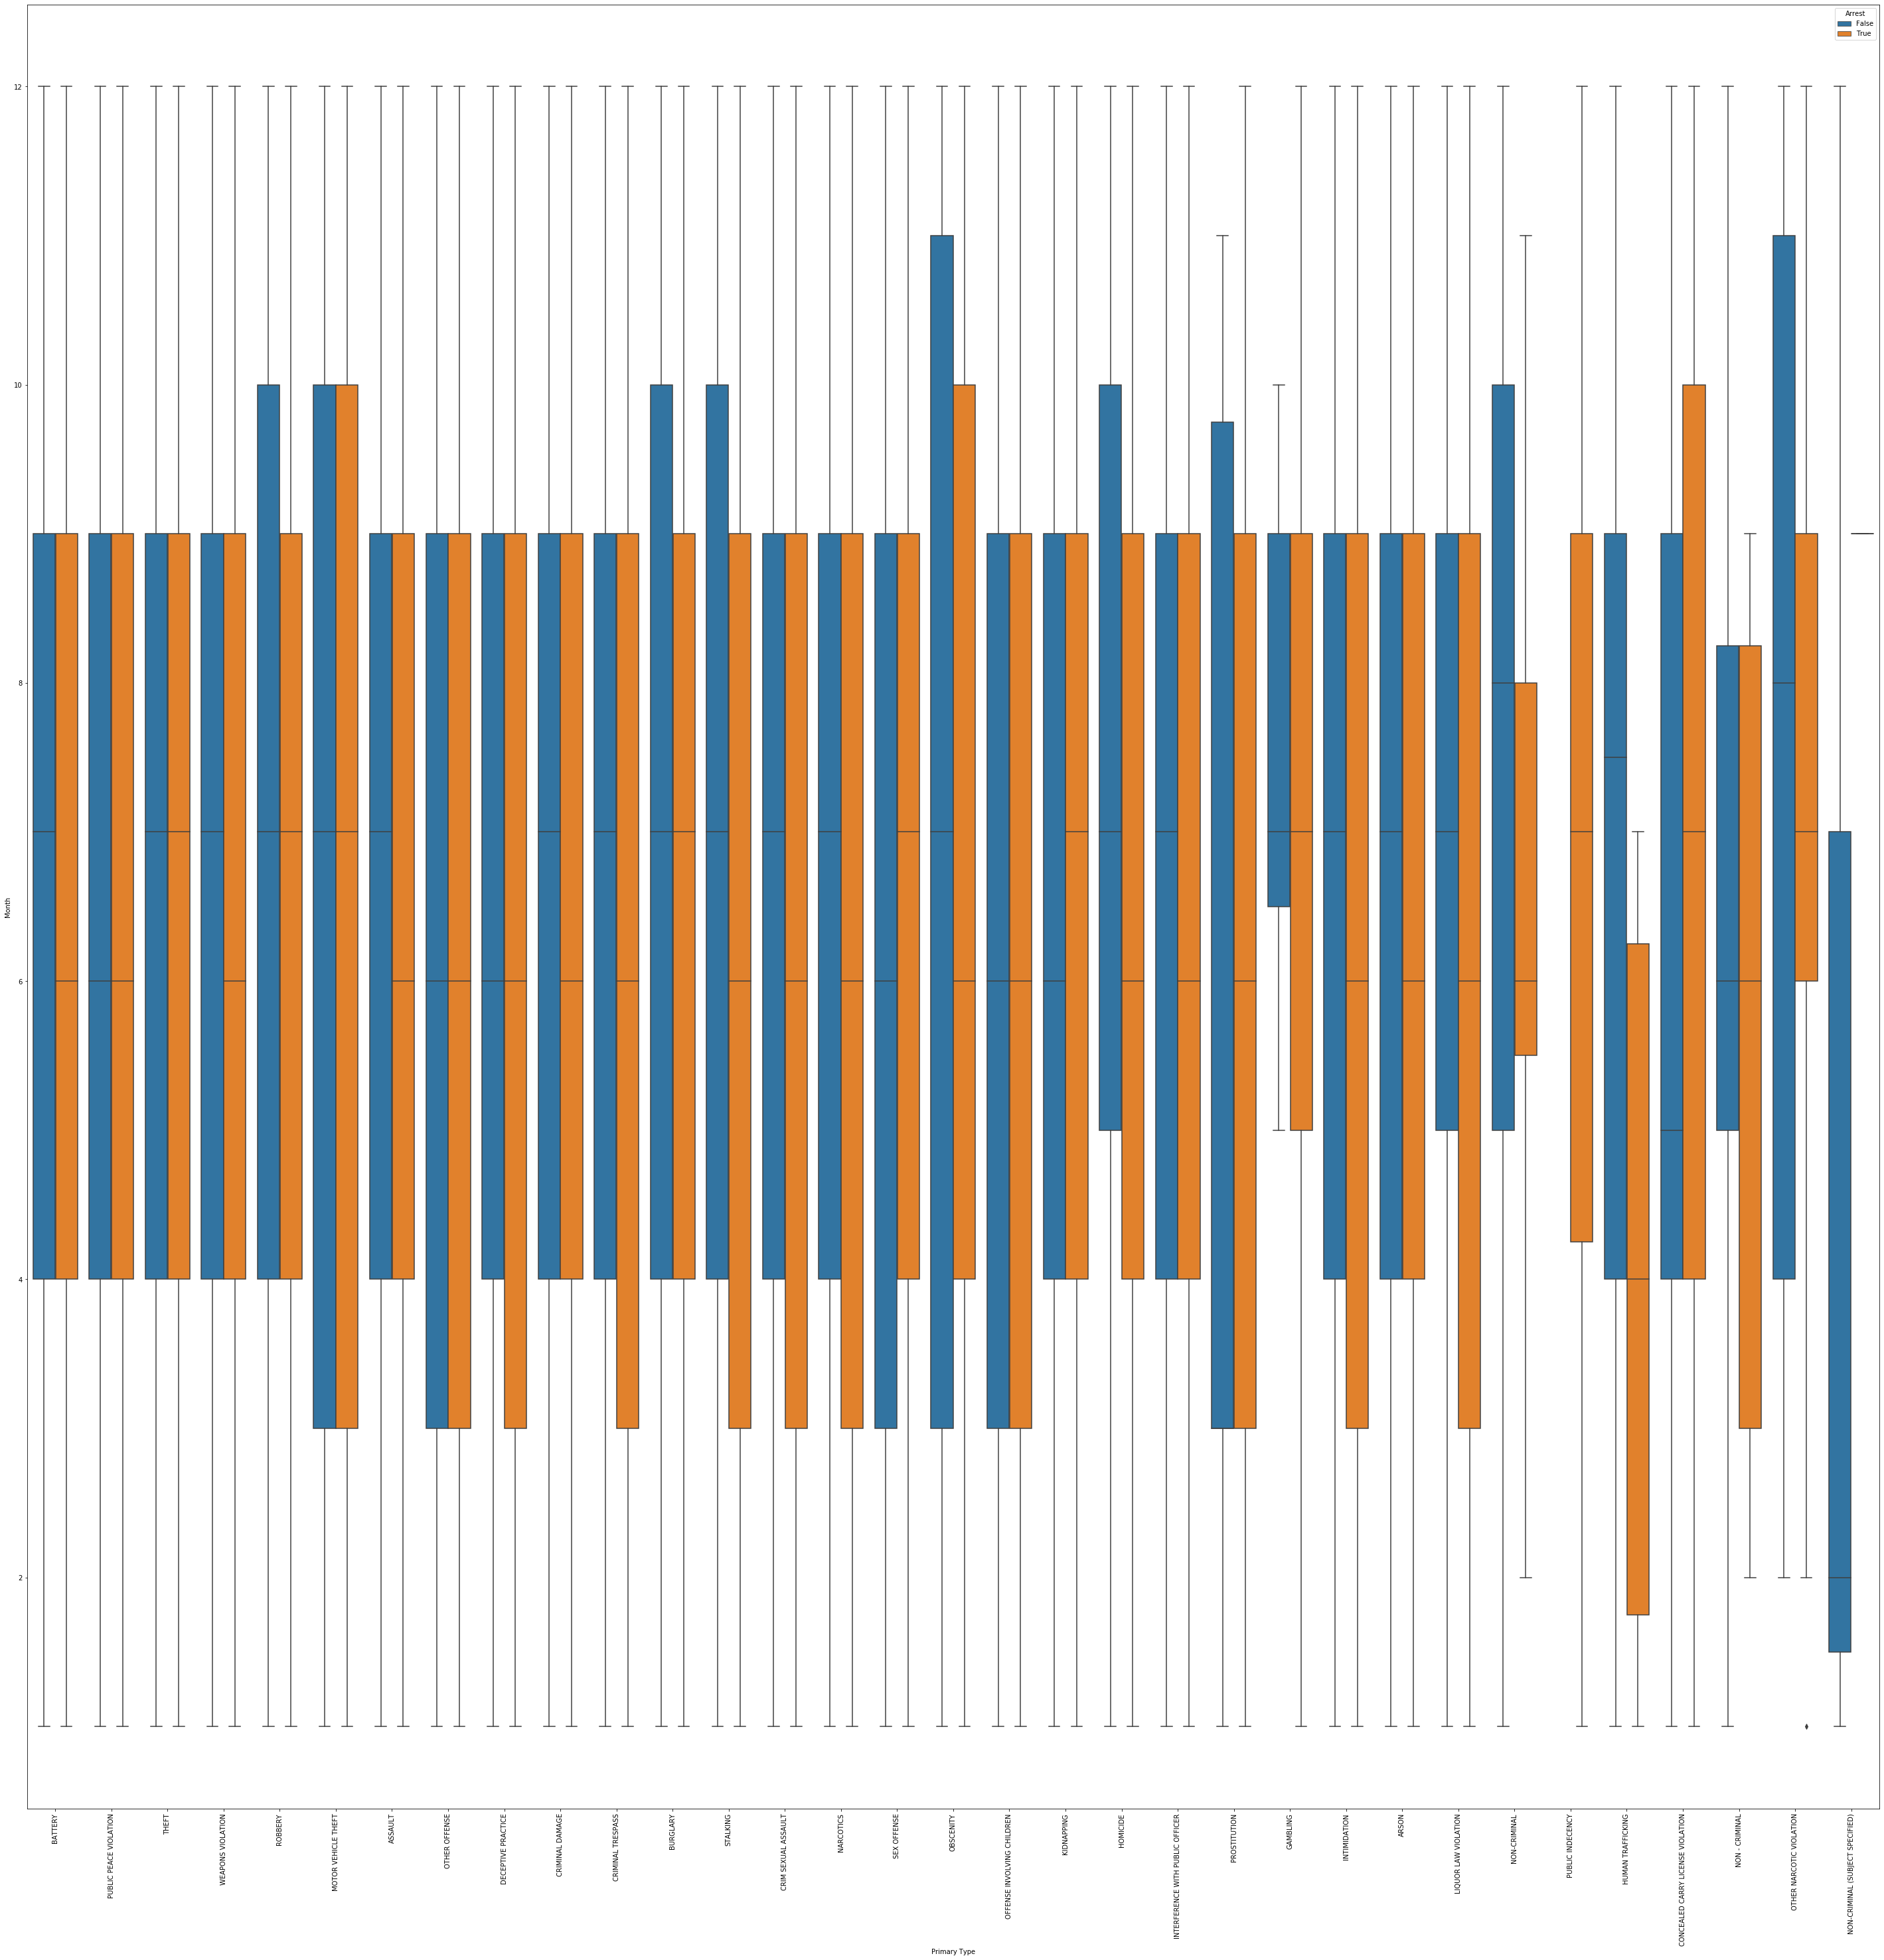

In [33]:
plt.figure(figsize = (50,50))
sns.boxplot(x = 'Primary Type', y = 'Month', data = data, hue = 'Arrest')
plt.xticks(rotation = 90)
plt.show()

In [25]:
data['Location Description'].value_counts()

STREET                 330471
RESIDENCE              233530
APARTMENT              185023
SIDEWALK               160891
OTHER                   55774
                        ...  
CLEANERS/LAUNDROMAT         1
CTA "L" TRAIN               1
RAILROAD PROPERTY           1
MOTEL                       1
CHURCH PROPERTY             1
Name: Location Description, Length: 142, dtype: int64

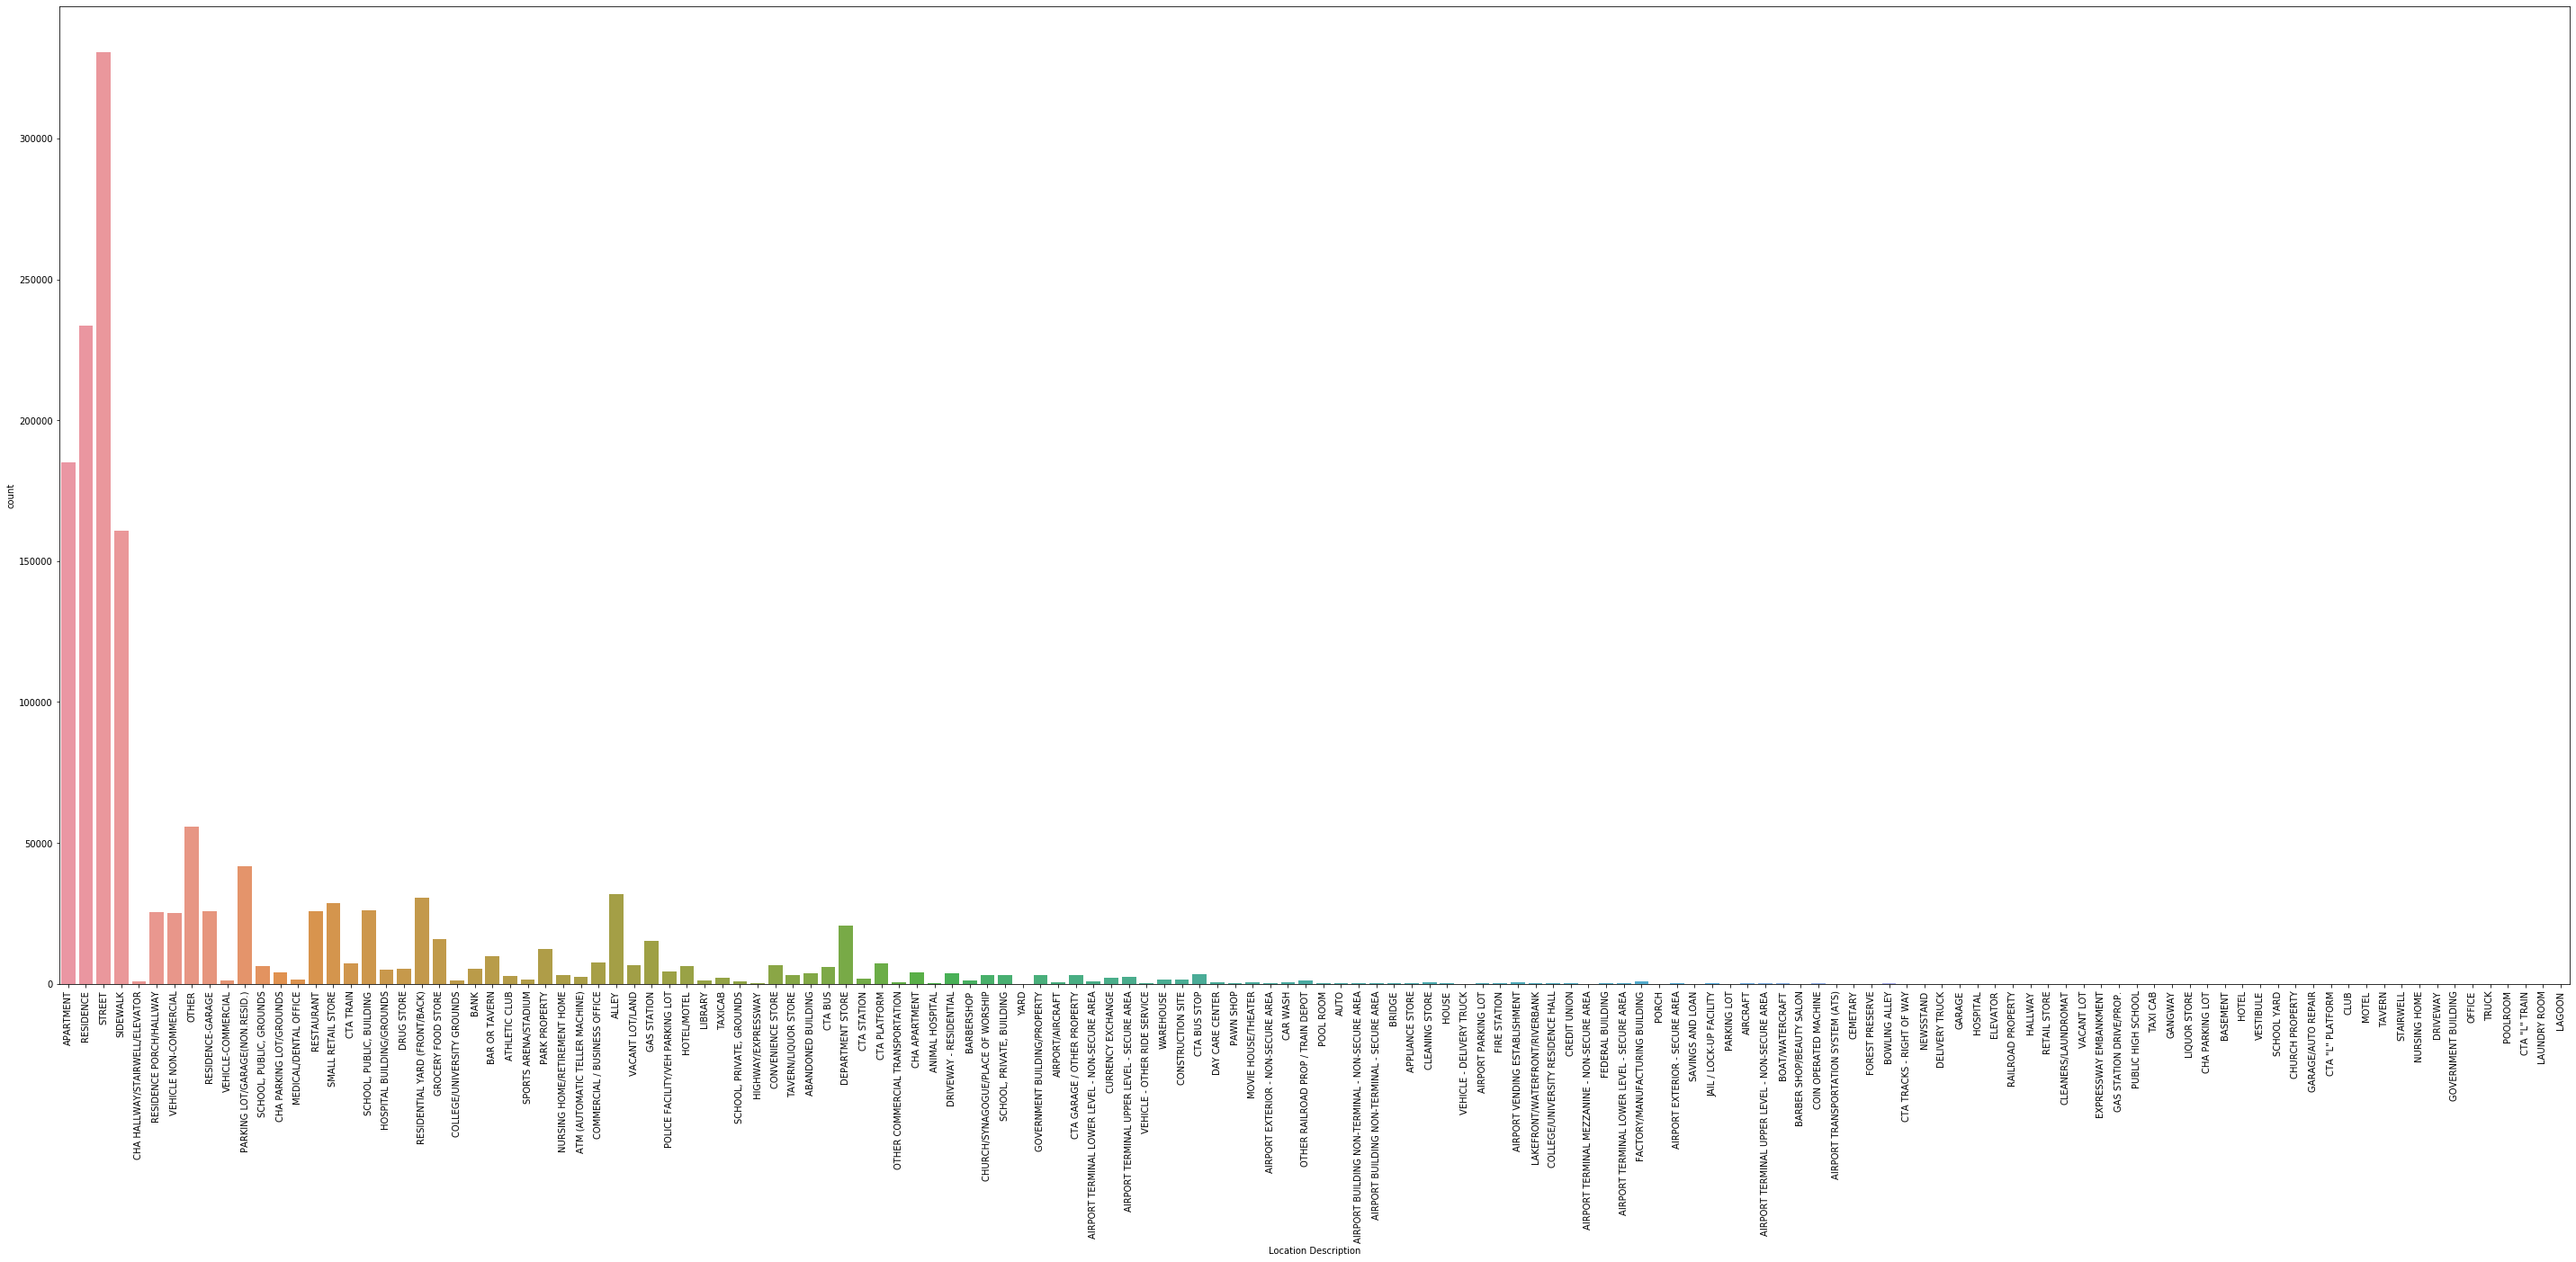

In [24]:
plt.figure(figsize = (50,20))
sns.countplot(data['Location Description'])
plt.xticks(rotation = 90)
plt.show()

From the above plot, it can be inferred that most of the crimes were committed at these 4 locations (STREET, RESIDENCE, APARTMENT, SIDEWALK), therefore, more resources should be deployed to these areas to minimize the number of committed crimes.

In [13]:
df2 = data.groupby(['Location Description', 'Description', 'Arrest'])['Arrest'].count()
df2 = pd.DataFrame(df2)
df2

Arrest
Location Description Description                 Arrest        
ABANDONED BUILDING   $500 AND UNDER              False       51
                                                 True        27
                     AGG CRIMINAL SEXUAL ABUSE   False        1
                                                 True         1
                     AGG PO HANDS NO/MIN INJURY  False        2
...                                                         ...
WAREHOUSE            UNLAWFUL POSS OF HANDGUN    False        1
                                                 True         1
                     UNLAWFUL POSS OTHER FIREARM False        1
YARD                 FIRST DEGREE MURDER         False       47
                                                 True        22

[13716 rows x 1 columns]

In [20]:
data['Domestic'].unique()

array([ True, False])

In [54]:
data['Domestic'].value_counts()

False    1236660
True      220054
Name: Domestic, dtype: int64

In [56]:
data.groupby(['Domestic', 'Arrest'])['Arrest'].count()

Domestic  Arrest
False     False     901888
          True      334772
True      False     177354
          True       42700
Name: Arrest, dtype: int64

In [61]:
data['District'].value_counts()

11.0    102878
8.0      96325
6.0      86915
4.0      85681
7.0      84373
25.0     83204
3.0      73195
9.0      70869
12.0     69482
10.0     66276
19.0     66115
5.0      65146
15.0     64508
18.0     63682
1.0      62022
2.0      60312
14.0     52509
16.0     50134
22.0     47484
17.0     41406
24.0     40449
20.0     23721
31.0        26
13.0         1
Name: District, dtype: int64

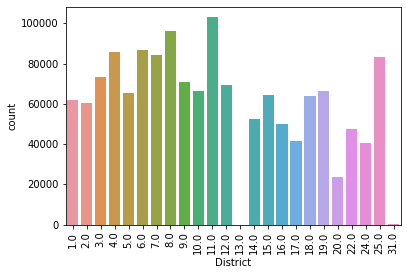

In [60]:
sns.countplot(data['District'])
plt.xticks(rotation = 90)
plt.show()

In the above plot, it can be inferred that District 11.0 has the highest number of crime, followed by District 8.0 while District 13.0 has the least number of crime.

In [30]:
data['Year'].unique()

array([2016, 2015, 2012, 2014, 2013, 2017], dtype=int64)

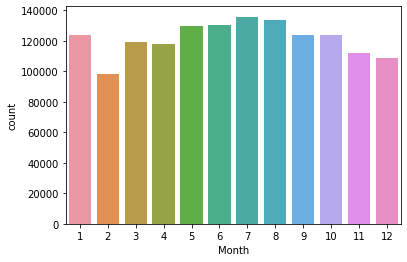

In [35]:
sns.countplot(data['Month'])

From the above plot, it can be inferred that more crimes were committed between May and August of which July has the highest number of crimes.

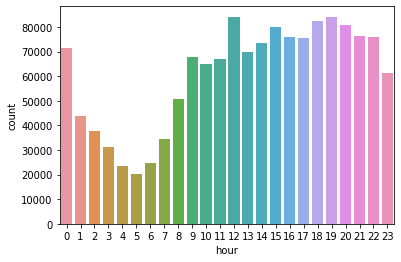

In [45]:
sns.countplot(data['hour'])

From the above plot, it can be inferred that the intensity of crimes committed between the hours of 5pm and 10pm is high although most of the crimes were committed at 12noon.

In [46]:
data['WeekDay'].unique()

array([1, 2, 3, 0, 4, 6, 5], dtype=int64)

In [74]:
data['WeekDay'].value_counts()

4    218643
5    209743
2    208374
1    206129
3    205851
0    205762
6    202212
Name: WeekDay, dtype: int64

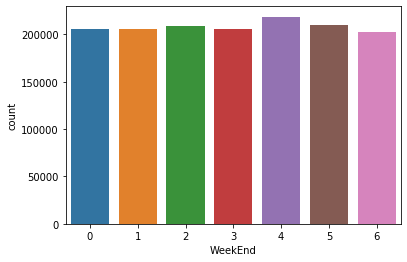

In [65]:
sns.countplot(data['WeekDay'])

From the above analysis, the number of crimes committed is evenly distributed across the days of the week. We cannot therefore say that crimes are more likely to be committed on a particular day of the week although Thursday has the highest number of crimes committed and Saturday has the least.

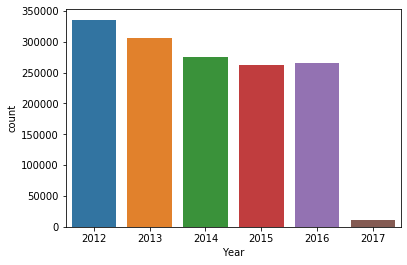

In [75]:
sns.countplot(data['Year'])

From the above plot, year 2012 has the highest number of crimes committed. More analyses could be done to discover the cause  of this. Likely causes include government policies, Inflation e.t.c.

In [ ]:
# data.iplot(x = 'X Coordinate', y = 'Y Coordinate', kind = 'scatter', mode = 'markers')

In [53]:
# data.iplot(x = 'Longitude', y = 'Latitude', kind = 'scatter', mode = 'markers')